#ABOUT

## About the Dataset 🧠

This dataset, originally provided by **Rajarshi Mandal**, is sourced from **[Kaggle](https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans)**. It consists of **7,023 MRI brain scan images** categorized into **four classes** based on the presence and type of brain tumor. These MRI scans are used to train and test AI models for **medical image classification**.

### 🔹 Dataset Structure  
The dataset is divided into **two main parts**:  

1. **Training Dataset** – [Brain Tumor MRI Scans - Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)  
   - This set contains labeled MRI images used to train AI models in recognizing and classifying brain tumors.  
   - It includes **multiple images per class**, ensuring the model learns different variations and patterns.  

2. **Testing Dataset** – [Brain Tumor Classification MRI - Kaggle](https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans)  
   - This dataset is used to evaluate the model's performance after training.  
   - It provides unseen MRI scans to check the model’s ability to generalize its predictions.  

---

### 🏷️ Tumor Categories

The MRI images in this dataset are categorized into **four classes**:

1. **Glioma Tumor**  
   - Originates from **glial cells** in the brain or spinal cord.  
   - One of the most **common and aggressive** types of brain tumors.  
   - Can grow quickly and impact neurological functions.  

2. **Meningioma Tumor**  
   - Develops in the **meninges**, the protective membranes surrounding the brain and spinal cord.  
   - Mostly **benign**, but their size and location can cause **pressure on the brain**.  

3. **Pituitary Tumor**  
   - Forms in the **pituitary gland**, which regulates **hormones** and essential bodily functions.  
   - Generally **non-cancerous**, but can **disrupt hormonal balance**, causing various health issues.  

4. **Healthy (No Tumor)**  
   - Contains **MRI scans of normal brains** with no visible tumors.  
   - Serves as a **control group** to help AI models differentiate between normal and abnormal brain structures.  

---

### 🔍 Purpose of the Dataset  
This dataset is widely used for:  
✔️ **Training AI models** for medical image analysis.  
✔️ **Benchmarking deep learning algorithms**, especially **Convolutional Neural Networks (CNNs)**.  
✔️ Assisting in **early tumor detection and diagnosis**.  
✔️ Developing **computer-aided diagnosis (CAD) systems** to support radiologists and neurologists.  

By leveraging this dataset, we aim to enhance **AI-driven medical imaging** and contribute to faster, more accurate diagnoses in healthcare. 🚀  



In [ ]:
#install Library
!pip install tensorflow

In [ ]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Specify the file location in Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_location = '/content/drive/MyDrive/PORTOFOLIO/BRAIN TUMOR 2'
print(os.listdir(file_location))


Mounted at /content/drive
['src', 'TEST', 'Brain Tumor.ipynb']


In [ ]:
# Define the file paths for each tumor type and healthy scans
src_path = os.path.join(file_location, 'src')  # Main source folder
glioma_tumor_path = os.path.join(src_path, 'glioma')  # Path for Glioma Tumor scans
meningioma_tumor_path = os.path.join(src_path, 'meningioma')  # Path for Meningioma Tumor scans
pituitary_tumor_path = os.path.join(src_path, 'pituitary')  # Path for Pituitary Tumor scans
healthy_path = os.path.join(src_path, 'healthy')  # Path for scans with no tumor

# Print the number of files in each category
print(f"Number of Glioma Tumor scans: {len(os.listdir(glioma_tumor_path))}")
print(f"Number of Meningioma Tumor scans: {len(os.listdir(meningioma_tumor_path))}")
print(f"Number of Pituitary Tumor scans: {len(os.listdir(pituitary_tumor_path))}")
print(f"Number of Healthy scans: {len(os.listdir(healthy_path))}")


Number of Glioma Tumor scans: 1621
Number of Meningioma Tumor scans: 1645
Number of Pituitary Tumor scans: 1757
Number of Healthy scans: 2000


In [ ]:
# Convert the data into a pandas DataFrame
tumor_data = {
    "Tumor Type": [
        "Glioma Tumor",
        "Meningioma Tumor",
        "Pituitary Tumor",
        "Healthy"
    ],
    "Number of Scans": [
        len(os.listdir(glioma_tumor_path)),
        len(os.listdir(meningioma_tumor_path)),
        len(os.listdir(pituitary_tumor_path)),
        len(os.listdir(healthy_path)),
    ]
}


tumor_table = pd.DataFrame(tumor_data)
tumor_table

,Tumor Type,Number of Scans
0,Glioma Tumor,1621
1,Meningioma Tumor,1645
2,Pituitary Tumor,1757
3,Healthy,2000


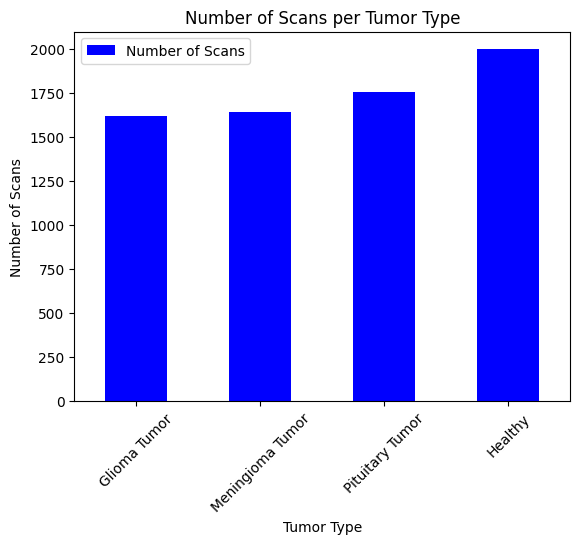

In [ ]:
#plot the tumor table
tumor_table.plot(x="Tumor Type", y="Number of Scans", kind="bar", color="blue")
plt.title("Number of Scans per Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Scans")
plt.xticks(rotation=45)
plt.show()

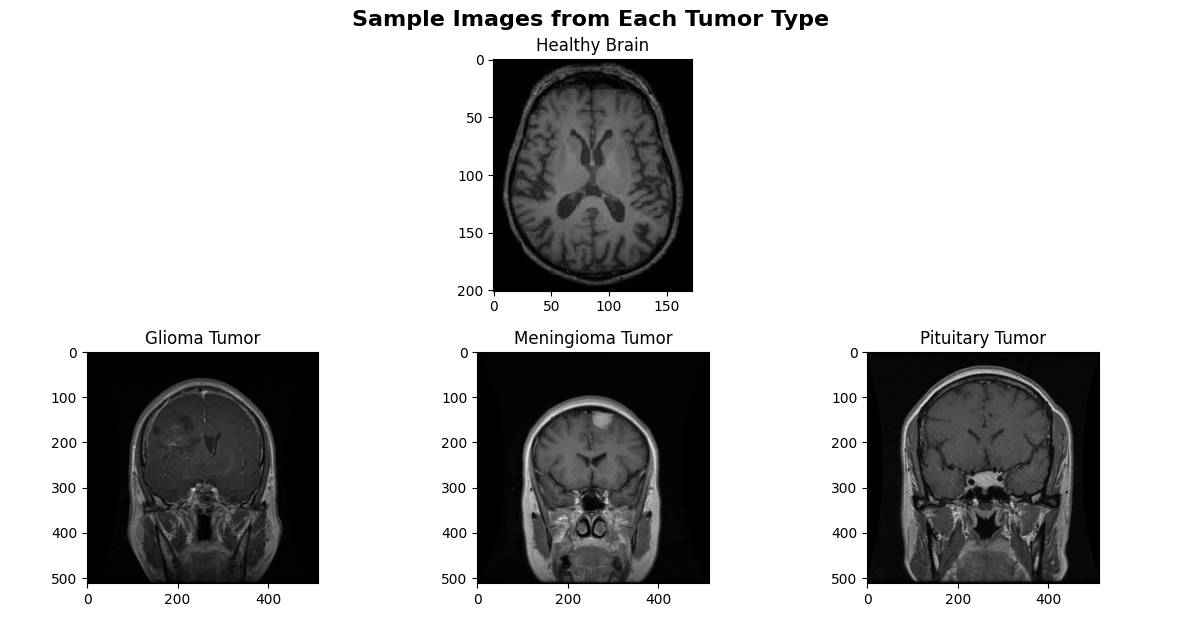

In [ ]:
from typing_extensions import Literal
from PIL import Image

# Define the paths
sample_image_healthy = os.path.join(healthy_path, os.listdir(healthy_path)[0])
sample_image_glioma = os.path.join(glioma_tumor_path, os.listdir(glioma_tumor_path)[0])
sample_image_meningioma = os.path.join(meningioma_tumor_path, os.listdir(meningioma_tumor_path)[0])
sample_image_pituitary = os.path.join(pituitary_tumor_path, os.listdir(pituitary_tumor_path)[0])

# Open the images using PIL
image_healthy = Image.open(sample_image_healthy)
image_glioma = Image.open(sample_image_glioma)
image_meningioma = Image.open(sample_image_meningioma)
image_pituitary = Image.open(sample_image_pituitary)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0, 0].axis('off')
axes[0, 2].axis('off')

axes[0, 1].imshow(image_healthy, cmap='gray')
axes[1, 0].imshow(image_glioma, cmap='gray')
axes[1, 1].imshow(image_meningioma, cmap='gray')
axes[1, 2].imshow(image_pituitary, cmap='gray')

axes[0, 1].set_title("Healthy Brain")
axes[1, 0].set_title("Glioma Tumor")
axes[1, 1].set_title("Meningioma Tumor")
axes[1, 2].set_title("Pituitary Tumor")


plt.tight_layout()
plt.suptitle("Sample Images from Each Tumor Type", fontsize=16, y=1.02, fontweight='bold')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size and image size
batch_size = 32
img_size = (150, 150)

# Set up generators
train_generator = train_datagen.flow_from_directory(
    src_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    src_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Display the classes and the number of images in each category
print(train_generator.class_indices)
print(f'Training data: {train_generator.samples} images')
print(f'Validation data: {validation_generator.samples} images')


Found 7023 images belonging to 4 classes.
Found 7023 images belonging to 4 classes.
{'glioma': 0, 'healthy': 1, 'meningioma': 2, 'pituitary': 3}
Training data: 7023 images
Validation data: 7023 images


In [ ]:
# Build the CNN model
model = tf.keras.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 2D outputs into 1D to feed into the fully connected layer
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 4 neurons for 4 classes: Glioma, Meningioma, Pituitary, Healthy
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping to prevent overfitting by stopping training when the validation loss doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 2479s 11s/step - accuracy: 0.4399 - loss: 1.2106 - val_accuracy: 0.5781 - val_loss: 1.0834
Epoch 2/20
  1/219 ━━━━━━━━━━━━━━━━━━━━ 19:57 5s/step - accuracy: 0.7500 - loss: 0.8320

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 65s 272ms/step - accuracy: 0.7500 - loss: 0.8320 - val_accuracy: 0.5333 - val_loss: 1.4858
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.6718 - loss: 0.8127 - val_accuracy: 0.5024 - val_loss: 1.4166
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6875 - loss: 0.6481 - val_accuracy: 0.4000 - val_loss: 1.6509
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.6981 - loss: 0.7269 - val_accuracy: 0.6074 - val_loss: 1.0237
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6562 - loss: 0.6148 - val_accuracy: 0.5333 - val_loss: 1.0446
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 664s 3s/step - accuracy: 0.7337 - loss: 0.6602 - val_accuracy: 0.5990 - val_loss: 1.0847
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.9062 - loss: 0.3672 - val_accuracy: 0.6000 - val_loss: 1.1803
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 628s 3s/step - accuracy: 0.7613 - loss: 0.5991 - val_accuracy: 0.69

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

220/220 ━━━━━━━━━━━━━━━━━━━━ 141s 641ms/step - accuracy: 0.7816 - loss: 0.5756
Validation Loss: 0.5666177272796631, Validation Accuracy: 0.7810052633285522


In [ ]:
# Save the trained model
model.save('brain_tumor_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model('brain_tumor_model1.H5')

ValueError: File format not supported: filepath=brain_tumor_model1.H5. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(brain_tumor_model1.H5, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# To make predictions for new images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)  # Get the class with the highest probability
    return class_idx, prediction

# Example of prediction
img_path = 'path_to_new_image.jpg'  # Replace with the path to the image you want to predict
class_idx, prediction = predict_image(img_path)
print(f"Predicted class index: {class_idx}, Prediction: {prediction}")

In [ ]:
from tensorflow.keras.preprocessing import image

img_size = (150, 150)

# Function to predict an image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    return class_idx, prediction

# Function to predict all images in a folder and return as a DataFrame
def predict_images_in_folder(folder_path):
    predictions = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure it's an image file
            class_idx, prediction = predict_image(img_path)
            predictions.append({
                'Image Name': img_name,
                'Predicted Class Index': class_idx,
                'Prediction': prediction.flatten()
            })
    df_predictions = pd.DataFrame(predictions)
    return df_predictions

# Test with another image
test_path_folder = os.path.join(file_location, 'TEST')
folder_path = os.path.join(test_path_folder, 'TEST2')
df_predictions = predict_images_in_folder(folder_path)

# Print the DataFrame as a table
df_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

,Image Name,Predicted Class Index,Prediction
0,2 (6).jpg,2,"[0.24619897, 0.004074463, 0.6272258, 0.122500755]"
1,2 (9).jpg,0,"[0.6961198, 0.00018233823, 0.23706794, 0.06662..."
2,2 (10).jpg,0,"[0.63662845, 0.00088337087, 0.34031996, 0.0221..."
3,2 (7).jpg,2,"[0.18722503, 0.03959023, 0.65673465, 0.116450146]"
4,2 (8).jpg,2,"[0.43835753, 0.00033717637, 0.54976124, 0.0115..."
5,3 (6).jpg,3,"[0.049978867, 0.077506565, 0.123948365, 0.7485..."
6,3 (5).jpg,3,"[0.017429862, 0.15382722, 0.19918095, 0.6295619]"
7,3 (7).jpg,3,"[0.32795158, 0.026754841, 0.18183395, 0.4634596]"
8,3 (4).jpg,3,"[0.04464521, 0.04141993, 0.0689044, 0.8450304]"
9,3 (9).jpg,3,"[0.00077782647, 0.011190307, 0.011574145, 0.97..."


In [ ]:
from tensorflow.keras.preprocessing import image

img_size = (150, 150)

# Function to predict an image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)

    healthy_percentage = round(prediction[0][1] * 100, 2)
    glioma_percentage = round(prediction[0][0] * 100, 2)
    meningioma_percentage = round(prediction[0][2] * 100, 2)
    pituitary_percentage = round(prediction[0][3] * 100, 2)

    tumor_class = ['GLIOMA', 'HEALTHY', 'MENINGIOMA', 'PITUITARY'][class_idx]
    return tumor_class, healthy_percentage, glioma_percentage, meningioma_percentage, pituitary_percentage, prediction.flatten()

# Function to predict all images in a folder and return as a DataFrame
def predict_images_in_folder(folder_path):
    predictions = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            tumor_class, healthy_percentage, glioma_percentage, meningioma_percentage, pituitary_percentage, prediction = predict_image(img_path)
            predictions.append({
                'img_name': img_name,
                'predicted_tumor': tumor_class,
                'healthy%': healthy_percentage,
                'glioma%': glioma_percentage,
                'meningioma%': meningioma_percentage,
                'pituitary%': pituitary_percentage
            })
    df_predictions = pd.DataFrame(predictions)
    return df_predictions

# Test with another image
test_path_folder = os.path.join(file_location, 'TEST')
folder_path = os.path.join(test_path_folder, 'TEST2')
df_predictions = predict_images_in_folder(folder_path)

# Print the DataFrame as a table
df_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━

,img_name,predicted_tumor,healthy%,glioma%,meningioma%,pituitary%
0,2 (6).jpg,MENINGIOMA,0.41,24.62,62.72,12.25
1,2 (9).jpg,GLIOMA,0.02,69.61,23.71,6.66
2,2 (10).jpg,GLIOMA,0.09,63.66,34.03,2.22
3,2 (7).jpg,MENINGIOMA,3.96,18.72,65.67,11.65
4,2 (8).jpg,MENINGIOMA,0.03,43.84,54.98,1.15
5,3 (6).jpg,PITUITARY,7.75,5.00,12.39,74.86
6,3 (5).jpg,PITUITARY,15.38,1.74,19.92,62.96
7,3 (7).jpg,PITUITARY,2.68,32.80,18.18,46.35
8,3 (4).jpg,PITUITARY,4.14,4.46,6.89,84.50
9,3 (9).jpg,PITUITARY,1.12,0.08,1.16,97.65
